# App Store Analytics
Explore thousands of apps data on Google Play store

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio

In [2]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
pio.renderers.default = 'svg'

## Data Exploration

In [4]:
df_apps = pd.read_csv('data/apps.csv')
df_apps.sample(n=10, replace=True, random_state=1)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
235,Trovami se ci riesci,GAME,5.0,11,6.100000,10,Free,0,Everyone,Arcade,"March 11, 2017",2.3 and up
5192,Castlight Mobile,MEDICAL,3.7,529,26.000000,"100,000",Free,0,Everyone,Medical,"July 30, 2018",5.0 and up
905,California Cop Assist CA Cop,PRODUCTIVITY,3.0,5,7.000000,100,Paid,$4.99,Everyone,Productivity,"February 11, 2014",2.2 and up
7813,QuickShortcutMaker,PERSONALIZATION,4.6,41000,2.000000,"1,000,000",Free,0,Everyone,Personalization,"February 23, 2014",1.6 and up
2895,HCP Anywhere,BUSINESS,4.7,114,8.600000,"5,000",Free,0,Everyone,Business,"March 30, 2018",4.3 and up
5056,Type S LED,LIFESTYLE,3.5,628,8.350000,"100,000",Free,0,Everyone,Lifestyle,"August 14, 2017",4.3 and up
144,Cy-Fair Houston Chamber,BUSINESS,NaN,0,5.000000,5,Free,0,Everyone,Business,"June 6, 2018",4.1 and up
4225,Cl-app!,SPORTS,NaN,41,0.344727,"10,000",Free,0,Everyone,Sports,"May 2, 2013",2.0 and up
7751,PJ Masks: HQ,FAMILY,4.1,13731,55.000000,"1,000,000",Free,0,Everyone,Entertainment;Action & Adventure,"June 22, 2018",4.0 and up
3462,Old: CL-150,FAMILY,3.8,120,24.000000,"10,000",Free,0,Everyone,Education,"May 21, 2018",4.0.3 and up


In [5]:
df_apps.shape

(10841, 12)

So our DataFrame has **10841** rows and **12** columns.

Let's check if there are any `NaN` values in it.

In [6]:
df_apps.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size_MBs          False
Installs          False
Type               True
Price             False
Content_Rating    False
Genres            False
Last_Updated      False
Android_Ver        True
dtype: bool

We can see that there are `NaN` values in **Rating**, **Type** and **Android_Ver** columns.

In [7]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


Now we are going to remove **Last_Updated** and **Android_Ver** because they are not necessary.

In [8]:
df_apps = df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1)

Let's see how many rows in the **Rating** and the **Type** columns have `NaN` values.

In [9]:
print(df_apps['Rating'].isna().value_counts())
print(df_apps['Type'].isna().value_counts())

False    9367
True     1474
Name: Rating, dtype: int64
False    10840
True         1
Name: Type, dtype: int64


There are 1474 rows in **Rating** and 1 row in **Type** have `NaN` values. Let's drop them.

In [10]:
df_apps = df_apps.dropna(axis=0)
df_apps.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size_MBs          False
Installs          False
Type              False
Price             False
Content_Rating    False
Genres            False
dtype: bool

In [11]:
df_apps.shape

(9367, 10)

We are not done yet. We have to find any duplicated apps and delete them. The way we do this is by looking up in the **App**, **Type** and **Price** columns and look for any duplicated features.

For example: let's look for any  duplicated **Instagram** in the DataFrame.

In [12]:
df_instagram = df_apps[df_apps['App'] == 'Instagram']
df_instagram

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [13]:
df_instagram.duplicated()

10806    False
10808    False
10809     True
10810    False
dtype: bool

We can see that there 4 entries of **Instagram** but only one at index **10809** is a duplicate. If we simply call [.drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicate) on our DataFrame, it will only remove the one at index **10809**. 

Therefore we have to tell our DataFrame how to identify a duplicate. We have to provide the column names that we want it to look for duplicated features in the `subset` parameter, in this case, look for duplicates in the **App**, **Type** and **Price** column.

In [14]:
df_apps[df_apps.duplicated(subset=['App', 'Type', 'Price'])]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.7,6,4.9,100,Free,0,Mature 17+,Dating
...,...,...,...,...,...,...,...,...,...,...
10836,Subway Surfers,GAME,4.5,27723193,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade
10837,Subway Surfers,GAME,4.5,27724094,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade
10838,Subway Surfers,GAME,4.5,27725352,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade
10839,Subway Surfers,GAME,4.5,27725352,76.0,"1,000,000,000",Free,0,Everyone 10+,Arcade


In [15]:
df_apps = df_apps.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps[df_apps.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social


Now we have successfully removed duplicated rows of Instagram as well as which of other apps.

In [16]:
df_apps.shape

(8199, 10)

Now we move on.

Let's take a look which apps have highest rating, which apps have largest size in MB, which ones have greatest number of reviews.

In [17]:
# apps with highest rating
df_apps.sort_values('Rating', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.0,2,22.0,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.0,36,2.6,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.0,13,2.6,100,Free,0,Everyone,Photography
1222,"Beacon Baptist Jupiter, FL",LIFESTYLE,5.0,14,2.6,100,Free,0,Everyone,Lifestyle
1214,BV Mobile Apps,PRODUCTIVITY,5.0,3,4.8,100,Free,0,Everyone,Productivity
2680,Florida Wildflowers,FAMILY,5.0,5,69.0,"1,000",Free,0,Everyone,Education
1206,ADS-B Driver,TOOLS,5.0,2,6.3,100,Paid,$1.99,Everyone,Tools
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12.0,"5,000",Free,0,Everyone,Comics


In [18]:
# apps with largest size in MB
df_apps.sort_values('Size_MBs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.5,6074334,100.0,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.0,254518,100.0,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,"5,000",Free,0,Everyone,Health & Fitness
9945,Ultimate Tennis,SPORTS,4.3,183004,100.0,"10,000,000",Free,0,Everyone,Sports
7926,Post Bank,FINANCE,4.5,60449,100.0,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.0,22435,100.0,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,"1,000,000",Paid,$0.99,Everyone 10+,Action
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100.0,"10,000",Free,0,Everyone,Racing


In [19]:
# apps with highest reviews
df_apps.sort_values('Reviews', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.5,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.6,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.5,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.6,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


We can see that those apps with highest rating have very little review, not enough to regulate more accurate rating.

Apps with highest size in MB are mostly games. And also, there seems to be an upper bound of 100MB in term of size limit on Google Play.

Finally, apps with highest reviews are mostly social network apps or communication apps and coincidentally free.

## Data Visualization with Plotly
All Android apps have a content rating like “Everyone” or “Teen” or “Mature 17+”. Let’s take a look at the distribution of the content ratings in our dataset and see how to visualise it with [plotly](https://plotly.com/python/)

In [20]:
ratings = df_apps['Content_Rating'].value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

Create a pie chart

In [21]:
labels_dict = {}

for key in ratings.index:
    labels_dict[key] = key

print(labels_dict)

{'Everyone': 'Everyone', 'Teen': 'Teen', 'Mature 17+': 'Mature 17+', 'Everyone 10+': 'Everyone 10+', 'Adults only 18+': 'Adults only 18+', 'Unrated': 'Unrated'}


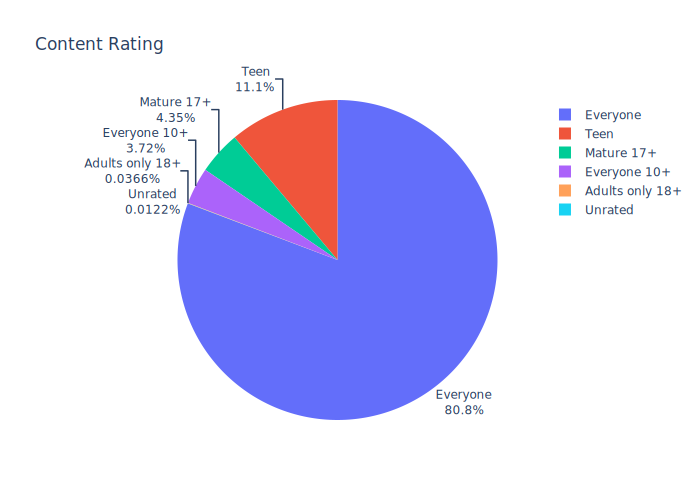

In [22]:
fig = px.pie(names=ratings.index, values=ratings, labels=labels_dict, title='Content Rating')

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

Look for apps that have over 1 billion installs. Careful, the `Install` column is not in the numeric format, indeed it is in string format because it contains `,` in its values.

In [23]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


First we replace the `,` with an empty string.

Then we use [to_numeric()](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric) method to convert the `Install` column to numeric format.

In [24]:
df_apps['Installs'] = df_apps['Installs'].str.replace(',', '')
df_apps['Installs'] = pd.to_numeric(df_apps['Installs'])
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   int64  
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 704.6+ KB


In [25]:
df_apps[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


We can see that there are 20 apps with more than 1 billion installs.

In [26]:
df_apps.sample(n=20, random_state=42)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
5113,MyLifeOrganized: To-Do List,PRODUCTIVITY,4.3,4441,4.000000,100000,Free,0,Everyone,Productivity
2693,Trinomial Factoring Wizard,TOOLS,4.0,22,0.080078,1000,Paid,$0.99,Everyone,Tools
10318,PAC-MAN,GAME,4.2,685981,37.000000,100000000,Free,0,Everyone,Arcade
3876,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000,10000,Free,0,Everyone,Books & Reference
6041,Manga Books,COMICS,3.8,7326,8.050000,500000,Free,0,Adults only 18+,Comics
7158,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.000000,1000000,Free,0,Everyone,Medical
4527,ER Blood Draw Doctor & Surgeon,FAMILY,4.0,154,58.000000,50000,Free,0,Teen,Educational
2940,Makeup Videos,BEAUTY,3.8,9,3.400000,5000,Free,0,Everyone,Beauty
1088,Phonics Puzzles,FAMILY,3.8,4,54.000000,100,Paid,$2.99,Everyone,Educational
1933,Complete Anatomy for Android,MEDICAL,4.1,90,21.000000,1000,Free,0,Everyone,Medical


Now we move on to finding top 20 most expensive apps.

The same with the `Install` column, the `Price` column is in string format because it contains `$` character in its values. We have to remove it and convert the column into numeric type.

In [27]:
df_apps['Price'] = df_apps['Price'].str.replace('$', '')
df_apps['Price'] = pd.to_numeric(df_apps['Price'])
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   int64  
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   float64
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 704.6+ KB


<ipython-input-27-faac03119c97>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Now, the top 20 most expensive apps.

In [28]:
df_apps.nlargest(20, 'Price')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle
1331,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment
1946,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
2394,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance
2461,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000000,1000,Paid,399.99,Everyone,Finance
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
3554,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle


Unbelievable, there are some apps that are ridiculously expensive that top **$400**.

The story goes that in 2008, Armin Heinrich released the very first I am Rich app in the iOS App Store for $999.90. The app does absolutely nothing. It just displays the picture of a gemstone and can be used to prove to your friends how rich you are. Armin actually made a total of 7 sales before the app was hastily removed by Apple. 

Nonetheless, it inspired a bunch of copycats on the Android App Store, but if you search today, you’ll find all of these apps have disappeared as well.

Leaving this bad data in our dataset will misrepresent our analysis of the most expensive 'real' apps. We might as well remove these apps.

In [29]:
df_apps = df_apps[df_apps['Price'] < 200]
df_apps.nlargest(20, 'Price')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.0,6,1.3,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.2,134,1.8,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000,Paid,33.99,Everyone,Medical
504,AP Art History Flashcards,FAMILY,5.0,1,96.0,10,Paid,29.99,Mature 17+,Education
2207,EMT PASS,MEDICAL,3.4,51,2.4,1000,Paid,29.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.2,64,41.0,1000,Paid,29.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.0,50000,Paid,29.99,Everyone,Sports
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.2,168,25.0,10000,Paid,24.99,Everyone,Medical
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25.0,100000,Paid,24.99,Everyone,Medical


If you were to release an app, would you choose to go after a competitive category with many other apps? Or would you target a popular category with a high number of downloads? Or perhaps you can target a category which is both popular but also one where the downloads are spread out among many different apps. That way, even if it’s more difficult to be discovered among all the other apps, your app has a better chance of getting installed, right? Let’s analyse this with bar charts and scatter plots and figure out which categories are dominating the market.

In [30]:
df_apps['Category'].nunique()

33

There are 33 different categories.

Now we need to find out which category has the most apps.

In [31]:
df_most_apps_cat = df_apps['Category'].value_counts().head(10)
df_most_apps_cat

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

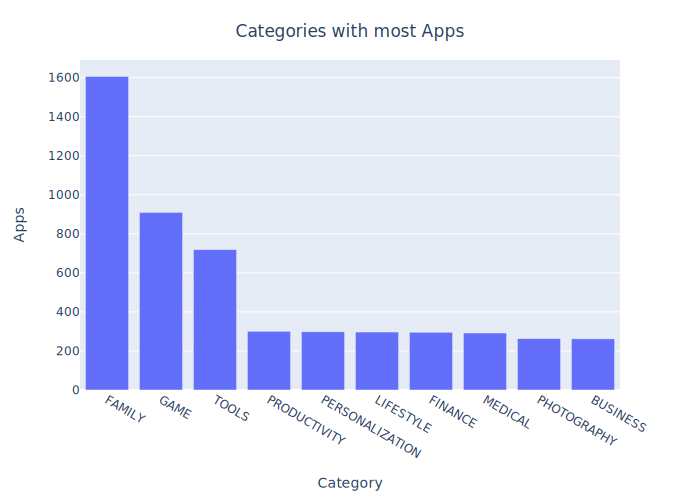

In [42]:
bar = px.bar(x=df_most_apps_cat.index,
             y=df_most_apps_cat.values)

bar.update_layout(xaxis_title='Category', yaxis_title='Apps', title={'x': 0.5,
                                                                 'y': 0.95,
                                                                 'xanchor': 'center',
                                                                 'yanchor': 'top',
                                                                 'text': 'Categories with most Apps'})
bar.show()


Now we find the categories with the most installs.

In [33]:
df_most_install_cat = df_apps[['Category', 'Installs']].groupby('Category').sum()
df_most_install_cat.sort_values('Installs', ascending=True, inplace=True)
df_most_install_cat

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


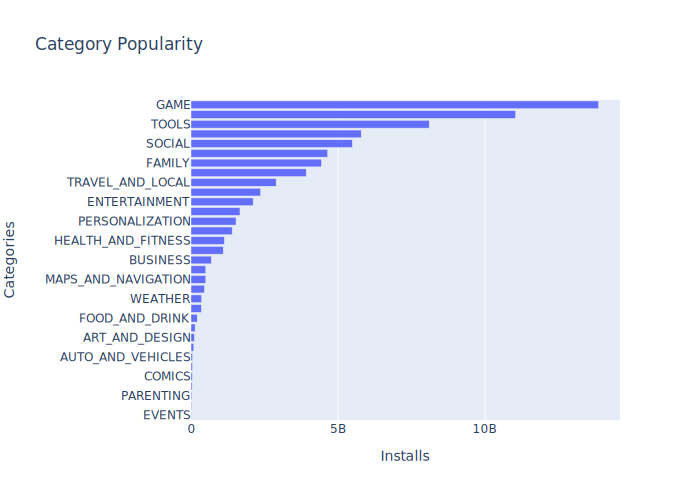

In [34]:
bar_h = px.bar(x=df_most_install_cat.Installs,
               y=df_most_install_cat.index,
               title='Category Popularity',
               orientation='h')

bar_h.update_layout(xaxis_title='Installs',
                    yaxis_title='Categories')
bar_h.show()


From the plot above, we can see that `GAME` and `COMMUNICATION` have the most installs. 

If we plot the number of installs of a category next to the number of apps in that category we can get an idea of how concentrated a category is. Do few apps have most of the downloads or are the downloads spread out over many apps?

In [35]:
df_app_installs = df_apps[['Category', 'App', 'Installs']].groupby('Category').agg({'App': pd.Series.count,
                                                                                    'Installs': pd.Series.sum, })
df_app_installs


,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,262,692018120
COMICS,54,44931100
COMMUNICATION,257,11039241530
DATING,134,140912410
EDUCATION,118,352852000


Note: Each **dot** on the chart represents each **category**. The `size` parameter is set to `App` means that the more apps each category has the bigger the dot for that category. The `color` parameter that is set to `Installs` will toggle the color bar on the right of the chart, this means that the number of installs of each category correspond to the color on the color bar.

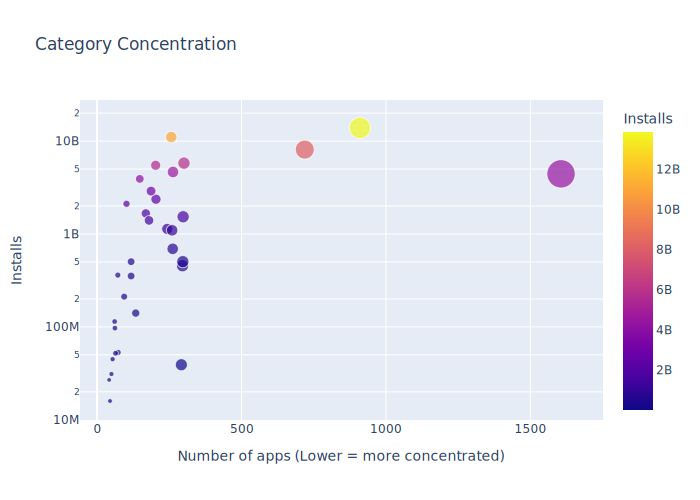

In [36]:
scatter = px.scatter(data_frame=df_app_installs,
                     x='App',
                     y='Installs',
                     title='Category Concentration',
                     log_y=True,
                     size='App',
                     hover_name=df_app_installs.index,
                     color='Installs')

scatter.update_layout(xaxis_title='Number of apps (Lower = more concentrated)')
scatter.show()


### Working with columns with nested data
Let’s turn our attention to the Genres column. This is quite similar to the categories column but more granular.

In [37]:
df_apps.Genres.nunique()

114

There are 114 different genres, but this is not quite accurate if we have nested data like we do in the `Genres` column.

We can see this in the below cell using `.value_counts()` and looking at the values that just have a single entry. There we see that the **semi-colon (;)** separates the genre names.

In [38]:
df_apps.Genres.value_counts().sort_values(ascending=True)[:11]

Lifestyle;Pretend Play                 1
Strategy;Education                     1
Adventure;Education                    1
Role Playing;Brain Games               1
Tools;Education                        1
Casual;Music & Video                   1
Board;Pretend Play                     1
Health & Fitness;Action & Adventure    1
Arcade;Pretend Play                    1
Strategy;Creativity                    1
Parenting;Brain Games                  1
Name: Genres, dtype: int64

We somehow need to separate the genre names to get a clear picture. This is where the string’s `.split()` method comes in handy. After we’ve separated our genre names based on the semi-colon, we can add them all into a single column with `.stack()` and then use `.value_counts()`.

In [39]:
stack = df_apps['Genres'].str.split(';', expand=True).stack()

print(stack)
print(f'Now we have a new column with shape: {stack.shape}')
print(f'Number of genres: {stack.nunique()}')


21     0                    Medical
28     0                     Arcade
47     0                     Arcade
82     0                     Arcade
99     0                    Medical
                     ...           
10824  0               Productivity
10828  0    Video Players & Editors
10829  0    Video Players & Editors
10831  0           News & Magazines
10835  0                     Arcade
Length: 8564, dtype: object
Now we have a new column with shape: (8564,)
Number of genres: 53


In [40]:
num_genres = stack.value_counts()
num_genres

Tools                      719
Education                  587
Entertainment              498
Action                     304
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink                94
Educational                 93
Adventur

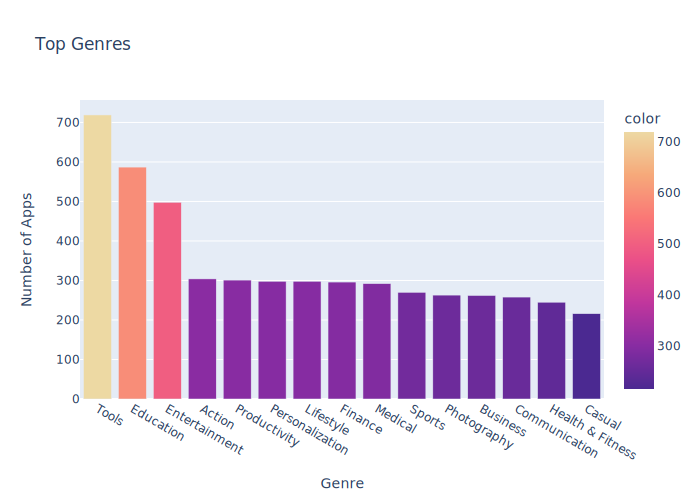

In [41]:
bar_genres = px.bar(x=num_genres.index[:15],
                    y=num_genres.values[:15],
                    color=num_genres.values[:15],
                    hover_name=num_genres.index[:15],
                    color_continuous_scale='agsunset',
                    title='Top Genres')
bar_genres.update_layout(xaxis_title='Genre', yaxis_title='Number of Apps')
bar_genres.show()


Now that we’ve looked at the total number of apps per category and the total number of apps per genre, let’s see what the split is between free and paid apps.

In [43]:
df_apps['Type'].value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

We can see that free apps form greate majority of the apps. But perhaps some categories have more paid apps than others. Let’s investigate. We can group our data first by Category and then by Type. Then we can add up the number of apps per each type. Using `as_index=False` we push all the data into columns rather than end up with our Categories as the index.

In [44]:
df_free_vs_paid = df_apps.groupby(['Category', 'Type'], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head(10)

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
5,BOOKS_AND_REFERENCE,Free,161
6,BOOKS_AND_REFERENCE,Paid,8
7,BUSINESS,Free,253
8,BUSINESS,Paid,9
9,COMICS,Free,54


In [45]:
df_free_vs_paid.tail(20)

,Category,Type,App
41,PERSONALIZATION,Free,233
42,PERSONALIZATION,Paid,65
43,PHOTOGRAPHY,Free,248
44,PHOTOGRAPHY,Paid,15
45,PRODUCTIVITY,Free,283
46,PRODUCTIVITY,Paid,18
47,SHOPPING,Free,178
48,SHOPPING,Paid,2
49,SOCIAL,Free,201
50,SOCIAL,Paid,2


In [46]:
df_free_vs_paid.sort_values('App', ascending=True)

,Category,Type,App
3,AUTO_AND_VEHICLES,Paid,1
24,FOOD_AND_DRINK,Paid,2
38,NEWS_AND_MAGAZINES,Paid,2
40,PARENTING,Paid,2
17,ENTERTAINMENT,Paid,2
...,...,...,...
31,LIFESTYLE,Free,284
21,FINANCE,Free,289
53,TOOLS,Free,656
25,GAME,Free,834


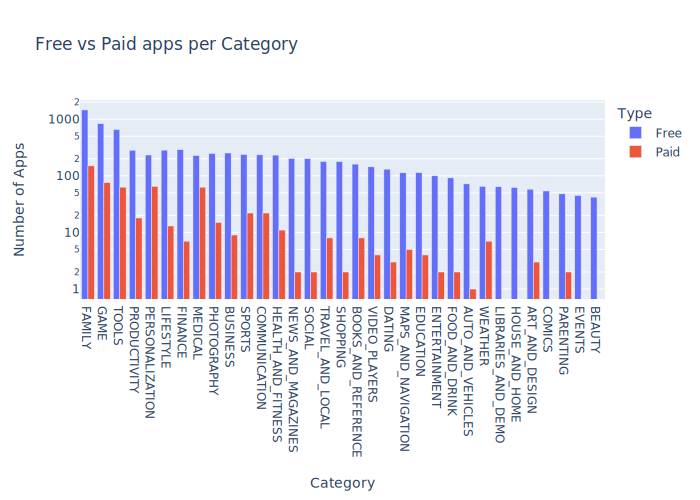

In [48]:
bar_free_vs_paid = px.bar(data_frame=df_free_vs_paid,
                          x='Category',
                          y='App',
                          title='Free vs Paid apps per Category',
                          color='Type',
                          barmode='group')

bar_free_vs_paid.update_layout(yaxis_title='Number of Apps',
                               xaxis={'title': 'Category',
                                      'categoryorder': 'total descending'},
                               yaxis_type='log',
                               )
bar_free_vs_paid.show()


To create the above bar chart:

1. Provide `x='Category'` and `y='App'`. But hold on, take a look back at our `df_free_vs_paid` DataFrame, we can see that some categories span two rows but each one of those rows holds different type of payment (Free and Paid). Therefore we have to identify each type for those categories.
2. Provide `color='Type'` to identify **Free type** and **Paid type** of certain categories.
3. Change `barmode` to `group` to place bars with different **Type** beside each other. See more documentation [here](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar).
4. The final step is optional, is to change the layout. Change the y-axis scale to log scale, change the category order to `total descending`, change the x-axis title and the y-axis title.

Additional doc:
* [Documentation on the categorical order](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).


From the above bar chart, we can come to a conclusion that for each category the number of free apps overwhelms the number of paid apps.

It's also worth noticing that some categories have relatively more paid apps than others, including Personalization, Medical and Weather. So, depending on the category you are targeting, it might make sense to release a paid-for app.

But this leads to many more questions:

* How much should you charge? What are other apps charging in that category?
* How much revenue could you make?
* And how many downloads are you potentially giving up because your app is paid?

Let’s try and answer these questions with some Box plots. Box plots show us some handy descriptive statistics in a graph - things like the median value, the maximum value, the minimum value, and some quartiles. 